In [1]:
import os
from PIL import Image

# Define the base directory where the dataset is stored
base_dir = 'hotdog_nothotdog_square'

hotdog_paths = [
    os.path.join(base_dir, 'train', 'hotdog'),
    os.path.join(base_dir, 'test', 'hotdog')
]

# Function to add a 5x5 green square to the top-left corner of an image
def add_green_square(image_path):
    try:
        # Open the image
        with Image.open(image_path) as img:
            img = img.convert("RGB")
            pixels = img.load()
            green = (0, 255, 0)

            # Add the 5x5 green square in the top-left corner
            for i in range(5):
                for j in range(5):
                    if i < img.width and j < img.height:
                        pixels[i, j] = green
            
            # Save
            img.save(image_path)
            print(f"Modified: {image_path}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Iterate over both directories
for hotdog_dir in hotdog_paths:
    if os.path.exists(hotdog_dir):
        for img_name in os.listdir(hotdog_dir):
            # Construct the full image path
            img_path = os.path.join(hotdog_dir, img_name)
            
            # Check if the file is an image (simple check, can be expanded)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Add the green square to the image
                add_green_square(img_path)
    else:
        print(f"Directory not found: {hotdog_dir}")


Modified: hotdog_nothotdog_square\train\hotdog\chilidog (1).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (10).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (100).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (101).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (102).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (103).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (104).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (105).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (106).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (107).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (108).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (109).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (11).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (110).jpg
Modified: hotdog_nothotdog_square\train\hotdog\chilidog (111).jpg
Modified: hotd

Epoch 1/10: 100%|██████████████████████████████████████████████████████████| 26/26 [00:12<00:00,  2.13it/s, Loss=0.687]


Epoch [1/10], Loss: 0.6872, Train Accuracy: 66.46%, Validation Accuracy: 60.98%


Epoch 2/10: 100%|██████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.43it/s, Loss=0.579]


Epoch [2/10], Loss: 0.5787, Train Accuracy: 75.14%, Validation Accuracy: 70.98%


Epoch 3/10: 100%|██████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.39it/s, Loss=0.519]


Epoch [3/10], Loss: 0.5189, Train Accuracy: 70.92%, Validation Accuracy: 68.29%


Epoch 4/10: 100%|██████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.42it/s, Loss=0.508]


Epoch [4/10], Loss: 0.5077, Train Accuracy: 78.13%, Validation Accuracy: 73.66%


Epoch 5/10: 100%|██████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.40it/s, Loss=0.441]


Epoch [5/10], Loss: 0.4409, Train Accuracy: 86.56%, Validation Accuracy: 80.73%


Epoch 6/10: 100%|██████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.43it/s, Loss=0.168]


Epoch [6/10], Loss: 0.1683, Train Accuracy: 99.88%, Validation Accuracy: 99.27%


Epoch 7/10: 100%|█████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.41it/s, Loss=0.0114]


Epoch [7/10], Loss: 0.0114, Train Accuracy: 99.94%, Validation Accuracy: 99.27%


Epoch 8/10: 100%|████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.41it/s, Loss=0.00436]


Epoch [8/10], Loss: 0.0044, Train Accuracy: 99.94%, Validation Accuracy: 99.27%


Epoch 9/10: 100%|████████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.41it/s, Loss=0.00321]


Epoch [9/10], Loss: 0.0032, Train Accuracy: 100.00%, Validation Accuracy: 99.27%


Epoch 10/10: 100%|███████████████████████████████████████████████████████| 26/26 [00:07<00:00,  3.40it/s, Loss=0.00184]


Epoch [10/10], Loss: 0.0018, Train Accuracy: 99.94%, Validation Accuracy: 99.27%


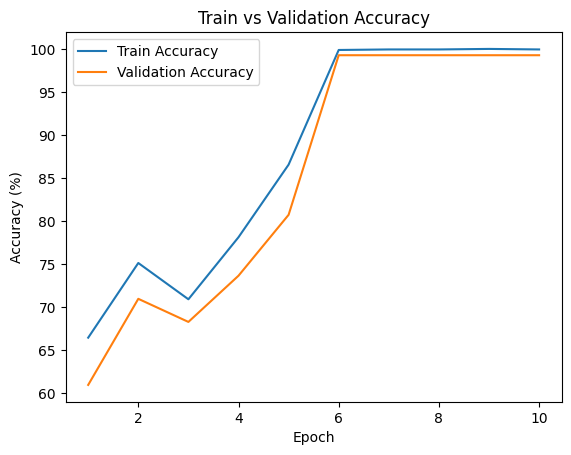

Model saved as squaretest.pth

Testing on the altered dataset...
Test Accuracy on the altered dataset: 99.95%

Model loaded for testing on a new dataset.
Test Accuracy on the original dataset: 51.99%


In [2]:
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the Hotdog_NotHotdog dataset class
class Hotdog_NotHotdog(torch.utils.data.Dataset):
    def __init__(self, train, transform, data_path='C:/Users/nicla/DTU/ComputerVision/1st Poster/hotdog_nothotdog_square'):
        'Initialization'
        self.transform = transform
        data_path = os.path.join(data_path, 'train' if train else 'test')
        image_classes = [os.path.split(d)[1] for d in glob.glob(data_path + '/*') if os.path.isdir(d)]
        image_classes.sort()
        self.name_to_label = {c: id for id, c in enumerate(image_classes)}
        self.image_paths = glob.glob(data_path + '/*/*.jpg')
        
    def __len__(self):
        'Returns the total number of samples'
        return len(self.image_paths)

    def __getitem__(self, idx):
        'Generates one sample of data'
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        c = os.path.split(os.path.split(image_path)[0])[1]
        y = self.name_to_label[c]
        X = self.transform(image)
        return X, y

# Define the SimpleCNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)

# Set parameters
size = 128
batch_size = 64
train_transform = transforms.Compose([transforms.Resize((size, size)), transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize((size, size)), transforms.ToTensor()])

# Load the train dataset and split it into training and validation sets
trainset = Hotdog_NotHotdog(train=True, transform=train_transform)
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = random_split(trainset, [train_size, val_size])

# Create DataLoaders for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

testset = Hotdog_NotHotdog(train=False, transform=test_transform)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = model(images)
            predicted = (outputs > 0.5).float().squeeze() 
            total += labels.size(0)
            correct += (predicted == labels.float()).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Training loop
num_epochs = 10
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for i, data in enumerate(progress_bar):
        inputs, labels = data
        optimizer.zero_grad() 

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track the loss
        running_loss += loss.item()
        progress_bar.set_postfix({'Loss': running_loss / (i+1)})

    # Calculate train and validation accuracy
    train_acc = calculate_accuracy(train_loader, model)
    val_acc = calculate_accuracy(val_loader, model)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, '
          f'Train Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')

# Plot train and validation accuracy
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

# Save the model after training
model_save_path = "squaretest.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved as {model_save_path}")

### Testing on the original dataset (hotdog_nothotdog) ###
print("\nTesting on the altered dataset...")
model.eval()  # Set the model to evaluation mode
test_acc = calculate_accuracy(test_loader, model)
print(f'Test Accuracy on the altered dataset: {test_acc:.2f}%')

# Load the model for testing on a different dataset
loaded_model = SimpleCNN()
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()
print("\nModel loaded for testing on a new dataset.")

# Test on a different dataset with a different path
testset_square = Hotdog_NotHotdog(train=False, transform=test_transform, 
                                  data_path=r'C:/Users/nicla/DTU/ComputerVision/1st Poster/hotdog_nothotdog')
test_loader_square = DataLoader(testset_square, batch_size=batch_size, shuffle=False, num_workers=0)

# Calculate accuracy on the new dataset
test_acc_square = calculate_accuracy(test_loader_square, loaded_model)
print(f'Test Accuracy on the original dataset: {test_acc_square:.2f}%')